In [1]:
import pandas as pd
pd.options.display.max_columns = None
import plotly.express as px
import os
import numpy as np

In [14]:
metrics_path = '/home/hhughes/Documents/Master_Thesis/Project/workspace/models/Model_comparative/'
model_metrics = os.listdir(metrics_path)

# load metric files done with old metrics
model_metrics_df = pd.DataFrame([])
for mm in model_metrics:
    with open(os.path.join(metrics_path, mm), 'r') as file:
        try:
            temp_df = pd.read_csv(file)
            print(mm, 'file loaded correctly')
        except:
            print('\nERROR!!!! Failed to load file: ',mm,'---------------------------------!\n')
        model_metrics_df = pd.concat((model_metrics_df, temp_df), ignore_index=True)
model_metrics_df['Parameter_file'] = [pf.split("/")[-1].split(".")[0] for pf in model_metrics_df.Parameters_file_path.values]


# Add missing columns
model_metrics_df['Bias_l2_reg'] = model_metrics_df.Dense_L2_reg
model_metrics_df['Aug_rand_h_flip'] = 1
model_metrics_df['Aug_rand_90deg_r'] = 1
model_metrics_df['Aug_Zoom'] = 1
mask = model_metrics_df.Parameters_file_path.str.contains('same_size|ss').values
temp_list = np.array(mask.shape[0] * ['random_uniform'])
temp_list[mask] = 'equal'
model_metrics_df['Aug_Zoom_mode'] = temp_list

# Load files with new metrics
metrics_path = '/home/hhughes/Documents/Master_Thesis/Project/workspace/models/Model_Metrics'
model_metrics = os.listdir(metrics_path)
for mm in model_metrics:
    with open(os.path.join(metrics_path, mm), 'r') as file:
        try:
            temp_df = pd.read_csv(file)
            temp_df['Parameter_file'] = [pf.split("/")[-1].split(".")[0]+'_no_bias' for pf in temp_df.Parameters_file_path.values]
            print(mm, 'file loaded correctly')
        except:
            print('\nERROR!!!! Failed to load file: ',mm,'---------------------------------!\n')
        model_metrics_df = pd.concat((model_metrics_df, temp_df), ignore_index=True)
        
model_metrics_df.Bias = model_metrics_df.Bias.abs()
# Set correct order of columns
columns = temp_df.columns
model_metrics_df = model_metrics_df[columns]

mask = (model_metrics_df.Set == 'val')
mask &= (model_metrics_df.CMA_size == 0)
model_metrics_df[mask].sort_values(by=['R2', 'Bias', 'Std'], ascending=False)

metrics_BL_t1_control.csv file loaded correctly
metrics_s_BL_t1.csv file loaded correctly
metrics_RN_ss.csv file loaded correctly
metrics_X_t2.csv file loaded correctly
metrics_BL_t2.csv file loaded correctly
metrics_RN_t2.csv file loaded correctly
metrics_RN_t1.csv file loaded correctly
metrics_BL_t1.csv file loaded correctly
metrics_RN_t3.csv file loaded correctly
metrics_s_BL.csv file loaded correctly
metrics_RN.csv file loaded correctly
metrics_X_control.csv file loaded correctly
metrics_RN_control.csv file loaded correctly
metrics_RN_t4.csv file loaded correctly
metrics_RN_t5.csv file loaded correctly
metrics_BL_ss.csv file loaded correctly
metrics_X.csv file loaded correctly
metrics_X_t1.csv file loaded correctly
metrics_BL.csv file loaded correctly
metrics_RN_ss_t1.csv file loaded correctly
RN50V2_test6.csv file loaded correctly
RN50V2_test1.csv file loaded correctly
BL_test2.csv file loaded correctly
RN50V2_test3.csv file loaded correctly
RN50V2_test4.csv file loaded correctly


,Model,Loss,lr,N_Epochs,Conv_L1_reg,Conv_L2_reg,Dense_L1_reg,Dense_L2_reg,Bias_l2_reg,PreTrained,Aug_rand_h_flip,Aug_rand_90deg_r,Aug_Zoom,Aug_Zoom_mode,Set,Bias,Std,R2,MAE,MSE,Huber,CMA_size,CMA,CMA_Std,Epoch,Parameters_file_path,Parameter_file
50,baseline_CNN,huber,0.001,650,0.0,0,0.0005,0.005,0.005,0,1,1,1,random_uniform,val,1.6663,38.4205,0.6197,29.8439,1474.9192,29.3484,0,29.8439,0.0,441,/storage/groups/ml01/code/andres.becker/master...,BL_test2
86,baseline_CNN,huber,0.001,450,0.0,0,0.0001,0.001,0.001,0,1,1,1,random_uniform,val,0.3256,38.6071,0.6167,30.2022,1486.5848,29.7052,0,30.2022,0.0,437,/storage/groups/ml01/code/andres.becker/master...,BL_test1
218,baseline_CNN,huber,0.001,450,0.0,0,0.0000,0.000,0.000,0,1,1,1,random_uniform,val,1.6953,38.6778,0.6145,29.7850,1494.8019,29.2877,0,29.7850,0.0,433,/storage/groups/ml01/code/andres.becker/master...,BL
194,Xception,huber,0.001,450,0.0,0,0.0000,0.000,0.000,1,1,1,1,random_uniform,val,3.6691,39.2976,0.5994,29.6838,1553.5901,29.1902,0,29.6838,0.0,274,/storage/groups/ml01/code/andres.becker/master...,Xception
266,baseline_CNN,huber,0.001,650,0.0,0,0.0005,0.005,0.000,0,1,1,1,random_uniform,val,5.2162,39.2464,0.5969,30.3205,1563.3285,29.8248,0,30.3205,0.0,380,/storage/groups/ml01/code/andres.becker/master...,BL_test2_no_bias
146,ResNet50V2,huber,0.001,450,0.0,0,0.0000,0.000,0.000,1,1,1,1,random_uniform,val,3.8839,39.8275,0.5882,30.5272,1597.0258,30.0315,0,30.5272,0.0,247,/storage/groups/ml01/code/andres.becker/master...,RN50V2_control
278,ResNet50V2,huber,0.001,450,0.0,0,0.1000,0.001,0.000,0,1,1,1,random_uniform,val,0.4817,40.0975,0.5865,31.2816,1603.6926,30.7831,0,31.2816,0.0,337,/storage/groups/ml01/code/andres.becker/master...,RN50V2_test3_no_bias
122,ResNet50V2,huber,0.001,450,0.0,0,0.0000,0.000,0.000,1,1,1,1,random_uniform,val,3.2001,39.9941,0.5860,30.4753,1605.4481,29.9800,0,30.4753,0.0,301,/storage/groups/ml01/code/andres.becker/master...,RN50V2
302,Xception,mean_absolute_error,0.001,450,0.0,0,0.0001,0.001,0.000,1,1,1,1,random_uniform,val,0.3100,40.3812,0.5806,30.6377,1626.3343,30.1383,0,30.6377,0.0,257,/storage/groups/ml01/code/andres.becker/master...,Xception_test1_no_bias
254,ResNet50V2,huber,0.001,450,0.0,0,0.0001,0.001,0.000,1,1,1,1,random_uniform,val,2.4780,40.3685,0.5793,30.7597,1631.3507,30.2635,0,30.7597,0.0,268,/storage/groups/ml01/code/andres.becker/master...,RN50V2_test1_no_bias


In [33]:
0 == sum(np.array([0.0,0]))

True

In [25]:
mask = (model_metrics_df.Set == 'val')
mask &= (model_metrics_df.CMA_size == 0)
mask &= (model_metrics_df.Model.str.contains('CNN'))
model_metrics_df[mask].sort_values(by=['R2', 'Bias', 'Std'], ascending=False)

,Model,Loss,lr,N_Epochs,Conv_L1_reg,Conv_L2_reg,Dense_L1_reg,Dense_L2_reg,Bias_l2_reg,PreTrained,Aug_rand_h_flip,Aug_rand_90deg_r,Aug_Zoom,Aug_Zoom_mode,Set,Bias,Std,R2,MAE,MSE,Huber,CMA_size,CMA,CMA_Std,Epoch,Parameters_file_path,Parameter_file
50,baseline_CNN,huber,0.001,650,0.0,0,0.0005,0.005,0.005,0,1,1,1,random_uniform,val,1.6663,38.4205,0.6197,29.8439,1474.9192,29.3484,0,29.8439,0.0,441,/storage/groups/ml01/code/andres.becker/master...,BL_test2
86,baseline_CNN,huber,0.001,450,0.0,0,0.0001,0.001,0.001,0,1,1,1,random_uniform,val,0.3256,38.6071,0.6167,30.2022,1486.5848,29.7052,0,30.2022,0.0,437,/storage/groups/ml01/code/andres.becker/master...,BL_test1
218,baseline_CNN,huber,0.001,450,0.0,0,0.0000,0.000,0.000,0,1,1,1,random_uniform,val,1.6953,38.6778,0.6145,29.7850,1494.8019,29.2877,0,29.7850,0.0,433,/storage/groups/ml01/code/andres.becker/master...,BL
266,baseline_CNN,huber,0.001,650,0.0,0,0.0005,0.005,0.000,0,1,1,1,random_uniform,val,5.2162,39.2464,0.5969,30.3205,1563.3285,29.8248,0,30.3205,0.0,380,/storage/groups/ml01/code/andres.becker/master...,BL_test2_no_bias
110,Small_baseline_CNN,huber,0.001,450,0.0,0,0.0000,0.000,0.000,0,1,1,1,random_uniform,val,3.6995,41.0419,0.5633,31.2348,1693.5728,30.7396,0,31.2348,0.0,240,/storage/groups/ml01/code/andres.becker/master...,Small_BL
2,baseline_CNN,huber,0.001,450,0.0,0,0.0001,0.001,0.001,0,1,1,1,random_uniform,val,0.3832,41.3858,0.5595,31.1370,1708.3047,30.6402,0,31.1370,0.0,147,/storage/groups/ml01/code/andres.becker/master...,BL_test1_control
182,baseline_CNN,huber,0.001,450,0.0,0,0.0000,0.000,0.000,0,1,1,1,equal,val,2.1403,41.5432,0.5550,31.8932,1725.7508,31.3962,0,31.8932,0.0,156,/storage/groups/ml01/code/andres.becker/master...,BL_same_size
14,Small_baseline_CNN,huber,0.001,450,0.0,0,0.0001,0.001,0.001,0,1,1,1,random_uniform,val,3.7071,42.0752,0.5412,32.6073,1779.2805,32.1093,0,32.6073,0.0,425,/storage/groups/ml01/code/andres.becker/master...,Small_BL_test1


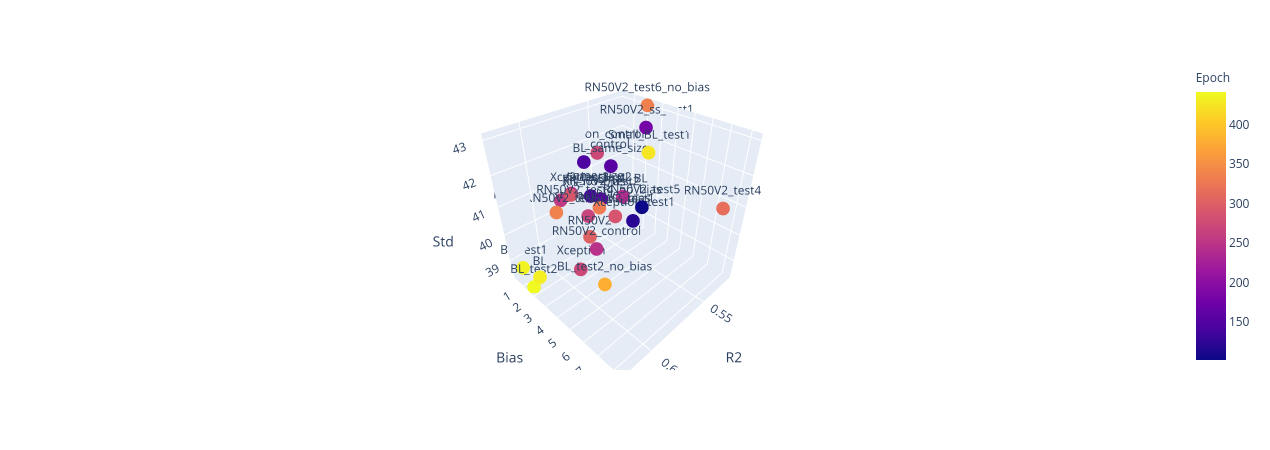

In [19]:
mask = np.ones(model_metrics_df.shape[0]).astype(np.bool)
mask &= model_metrics_df.Set == 'val' 
#mask &= model_metrics_df.R2 > 0.55
#mask &= model_metrics_df.MAE < 35
mask &= model_metrics_df.CMA_size == 0

temp_df = model_metrics_df[mask]

fig = px.scatter_3d(temp_df, 
                    x='R2', y='Bias', z='Std',
                    text='Parameter_file',
                    #color=temp_df['Bias_l2_reg'].astype(str),
                    color='Epoch'
                   )

fig.show()

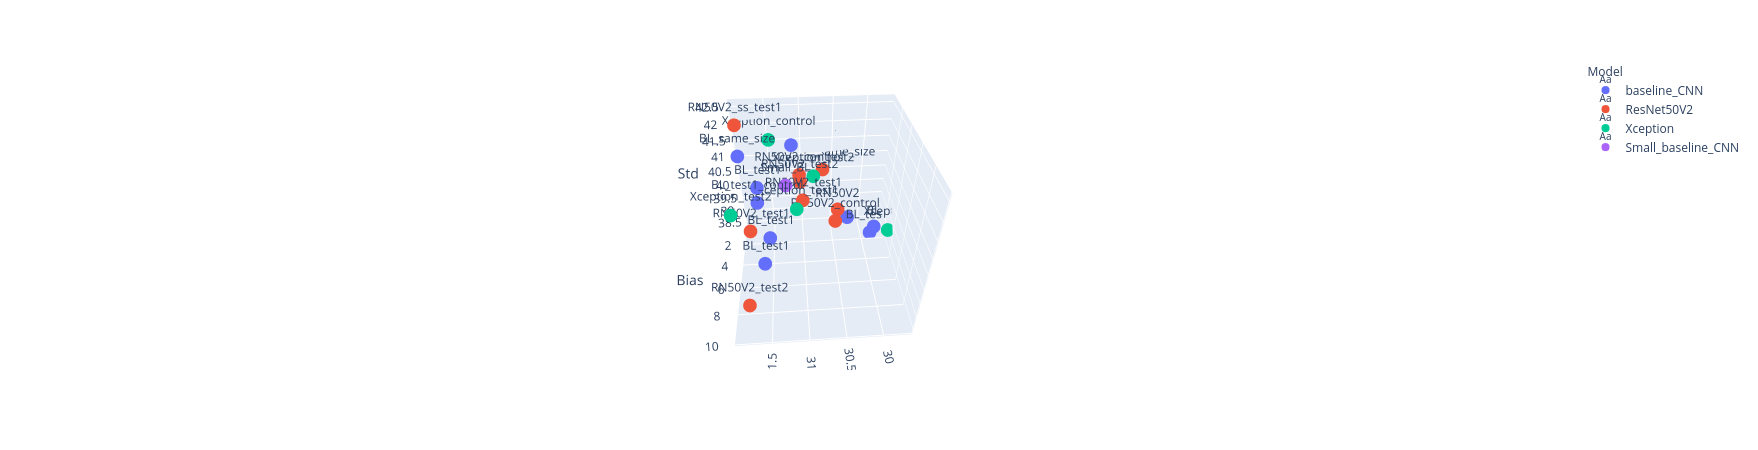

In [8]:
mask = (model_metrics_df.Set == 'val') & (model_metrics_df.MAE < 32)
temp_df = model_metrics_df[mask]

fig = px.scatter_3d(temp_df, 
                    x='MAE', y='Bias', z='Std',
                    text='Parameter_file',
                    #color=temp_df['CMA_size'].astype(str))
                    color='Model')
fig.show()

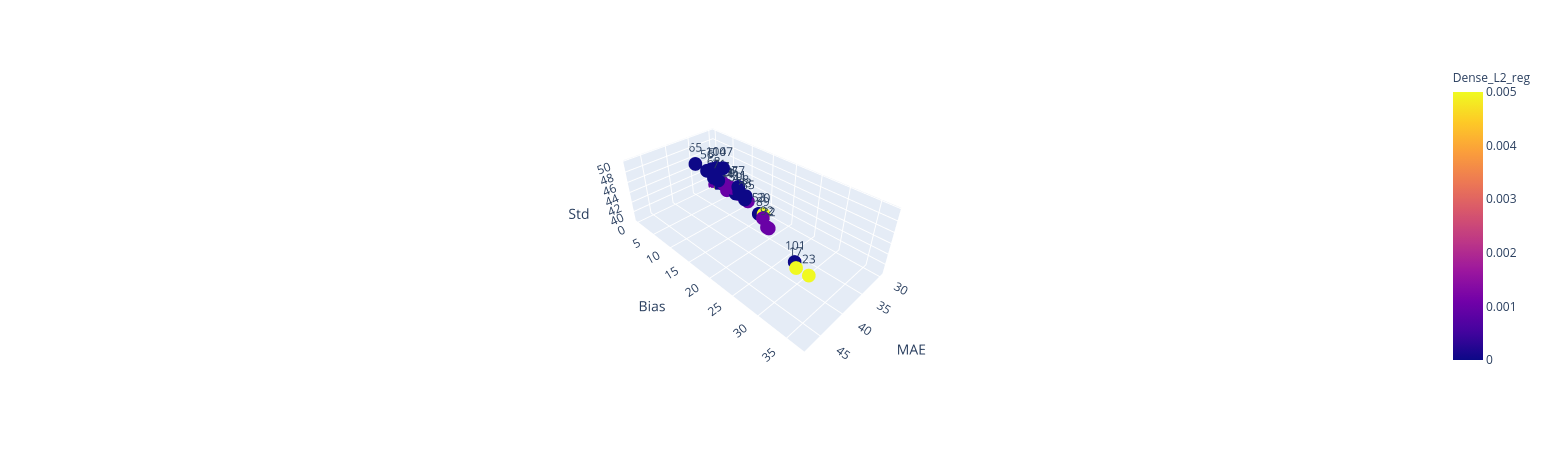

In [7]:
fig = px.scatter_3d(model_metrics_df[mask].reset_index(), 
                    x='MAE', y='Bias', z='Std',
                    text='index',
                    color='Dense_L2_reg')
fig.show()

In [12]:
model_metrics_df.loc[[26, 50, 2]].sort_values(by=['MAE', 'Bias', 'Std'])

,Model,Loss,lr,N_Epochs,Conv_L1_reg,Conv_L2_reg,Dense_L1_reg,Dense_L2_reg,PreTrained,Set,Bias,Std,R2,MAE,MSE,Huber,CMA_size,CMA,CMA_Std,Epoch,Parameters_file_path,Parameter_file
50,ResNet50V2,huber,0.001,450,0,0,0.0000,0.000,1,val,3.2001,39.9941,0.5860,30.4753,1605.4481,29.9800,0,30.4753,0.0,301,/storage/groups/ml01/code/andres.becker/master...,RN50V2
2,ResNet50V2,huber,0.001,450,0,0,0.0000,0.000,1,val,0.7306,40.6330,0.5753,30.6607,1647.1150,30.1656,0,30.6607,0.0,240,/storage/groups/ml01/code/andres.becker/master...,RN50V2_same_size
26,ResNet50V2,huber,0.001,450,0,0,0.0001,0.001,1,val,3.8909,40.6012,0.5722,31.0042,1659.1368,30.5067,0,31.0042,0.0,287,/storage/groups/ml01/code/andres.becker/master...,RN50V2_test1


In [8]:
mask = (model_metrics_df.Set == 'val') & (model_metrics_df.Model == 'Xception') #& (model_metrics_df.CMA_size == 0)
model_metrics_df[mask].sort_values(by=['MAE', 'Bias', 'Std'])

,Model,Loss,lr,N_Epochs,Conv_L1_reg,Conv_L2_reg,Dense_L1_reg,Dense_L2_reg,PreTrained,Set,Bias,Std,R2,MAE,MSE,Huber,CMA_size,CMA,CMA_Std,Epoch,Parameters_file_path,Parameter_file
158,Xception,huber,0.001,450,0,0,0.0000,0.000,1,val,3.6691,39.2976,0.5994,29.6838,1553.5901,29.1902,0,29.6838,0.0000,274,/storage/groups/ml01/code/andres.becker/master...,Xception
164,Xception,huber,0.001,450,0,0,0.0000,0.000,1,val,3.6691,39.2976,0.5994,29.6838,1553.5901,29.1902,21,33.8687,3.0378,274,/storage/groups/ml01/code/andres.becker/master...,Xception
38,Xception,huber,0.001,450,0,0,0.0000,0.000,0,val,1.9758,40.7789,0.5713,30.8244,1662.3310,30.3288,0,30.8244,0.0000,142,/storage/groups/ml01/code/andres.becker/master...,Xception_test2
170,Xception,mean_absolute_error,0.001,450,0,0,0.0001,0.001,1,val,4.8500,40.6505,0.5690,31.0957,1671.5178,30.5983,0,31.0957,0.0000,121,/storage/groups/ml01/code/andres.becker/master...,Xception_test1
122,Xception,huber,0.001,450,0,0,0.0000,0.000,1,val,0.8852,41.6933,0.5527,31.4630,1734.4144,30.9654,0,31.4630,0.0000,273,/storage/groups/ml01/code/andres.becker/master...,Xception_control
44,Xception,huber,0.001,450,0,0,0.0000,0.000,0,val,6.2217,41.0416,0.5568,31.9265,1718.5701,31.4279,21,33.9753,2.2525,248,/storage/groups/ml01/code/andres.becker/master...,Xception_test2
47,Xception,huber,0.001,450,0,0,0.0000,0.000,0,val,6.2217,41.0416,0.5568,31.9265,1718.5701,31.4279,31,34.2062,2.5426,248,/storage/groups/ml01/code/andres.becker/master...,Xception_test2
161,Xception,huber,0.001,450,0,0,0.0000,0.000,1,val,11.4726,44.3642,0.4599,34.1139,2094.4859,33.6180,11,32.3624,1.9564,277,/storage/groups/ml01/code/andres.becker/master...,Xception
125,Xception,huber,0.001,450,0,0,0.0000,0.000,1,val,11.2742,43.3902,0.4830,34.1206,2004.7269,33.6232,11,33.5292,1.0396,392,/storage/groups/ml01/code/andres.becker/master...,Xception_control
131,Xception,huber,0.001,450,0,0,0.0000,0.000,1,val,11.2398,43.2415,0.4866,34.1534,1991.1080,33.6564,31,34.2581,2.4560,274,/storage/groups/ml01/code/andres.becker/master...,Xception_control
